In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.random_projection import GaussianRandomProjection
from sklearn.cluster import KMeans
from sklearn import random_projection
from sklearn.metrics.cluster import rand_score
from itertools import permutations
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
import umap
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set font to match Latex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})

## Problem 1: Preprocessing the dataset

In [3]:
col_names = ['area', 'perimeter', 'compactness','kernel_length','kernel_width','asymmetry_coef','kernel_groove_length','numerical_class']

df = pd.read_table('seeds.tsv', header=None, names=col_names) 
df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
#Normalization of data - MinMmax Scaler
scaler_minmax = MinMaxScaler(feature_range=(0,1))
norm_df = scaler_minmax.fit_transform(df)
norm_df = pd.DataFrame(norm_df, columns=col_names)
norm_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,0.0
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,0.0
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,0.0
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,0.0
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,0.0
...,...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821,1.0
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306,1.0
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402,1.0
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,1.0


In [5]:
#Standardization of data - Standard Scaler (currently not using)
scaler_standard = StandardScaler()
standard_df = scaler_standard.fit_transform(df)
standard_df = pd.DataFrame(standard_df, columns=col_names)
standard_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,-1.224745
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,-1.224745
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,-1.224745
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,-1.224745
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,-1.224745
...,...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413,1.224745
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156,1.224745
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060,1.224745
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535,1.224745


## Problem 2: Determining the appropriate number of clusters

In [6]:
# Set the Species label aside by dropping it
df_new = standard_df.drop('numerical_class', axis=1)
df_new

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

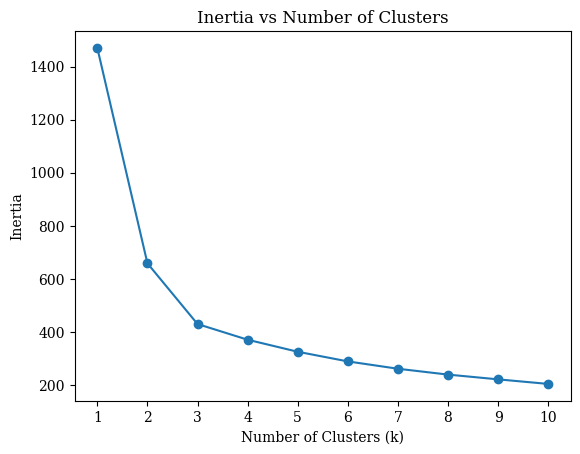

In [7]:
k_values = range(1, 11)  # Try k from 1 to 10

# Compute inertia for each value of k
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new)  
    inertia_values.append(kmeans.inertia_)
    

# Plot the inertia as a function of k
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.xticks(k_values)

plt.savefig('inertia.pdf')

plt.show()

By examining the plot of inertia versus the number of clusters (k), you can identify the appropriate number of clusters. Typically, the appropriate number of clusters (k) can be determined by looking for an "elbow" point in the plot, where the inertia starts to decrease at a slower rate. This point indicates the number of clusters beyond which the marginal gain in inertia reduction diminishes significantly. However, the choice of the appropriate number of clusters also depends on the specific context of your data and the goals of your analysis.

## Problem 3

### a)

In [8]:
df_new_no_labels = pd.DataFrame(df_new)


In [9]:
df_new_no_labels

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


In [10]:
col_names_new = df_new.columns
col_names_new

kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(df_new)

cluster_labels = kmeans2.labels_

df_new['labels'] = cluster_labels



/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
df_new['labels'].unique()

array([2, 0, 1], dtype=int32)

/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

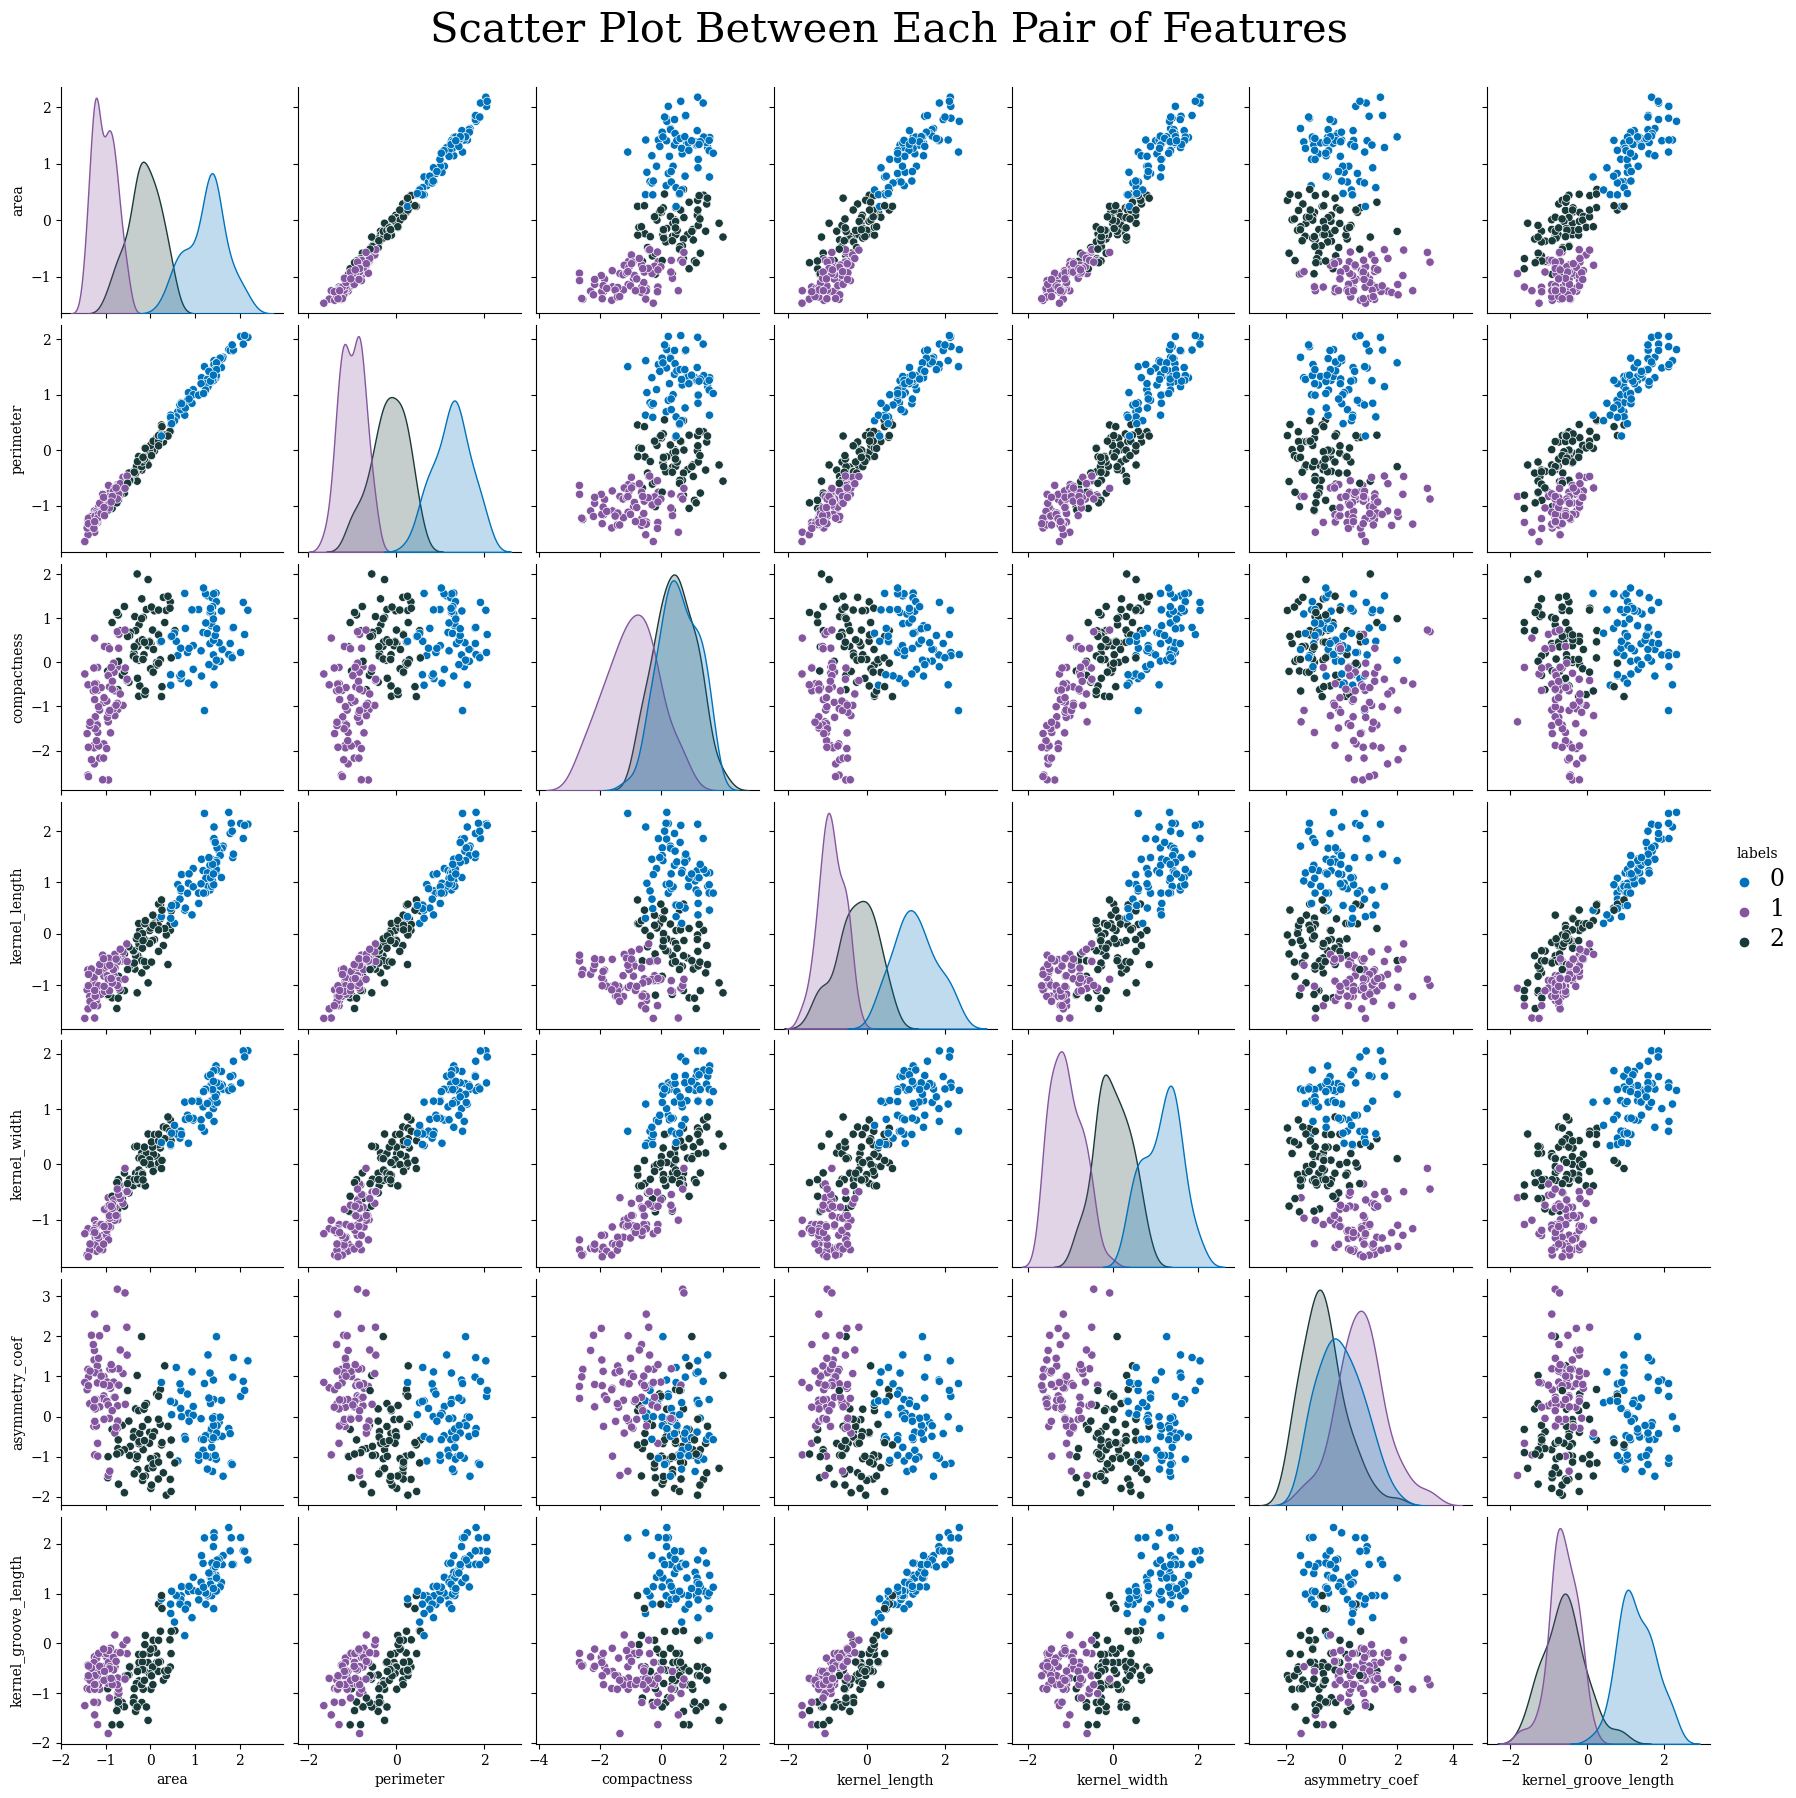

In [12]:
palette = {0:'#0072BB', 1:'#84569F', 2:'#1A3A3A'}
pairp = sns.pairplot(df_new, kind='scatter', hue='labels', palette=palette)
pairp.figure.suptitle("Scatter Plot Between Each Pair of Features", y=1.03, fontsize=30)
plt.setp(pairp.legend.get_texts(), fontsize='17')

plt.savefig('pairplt.pdf')


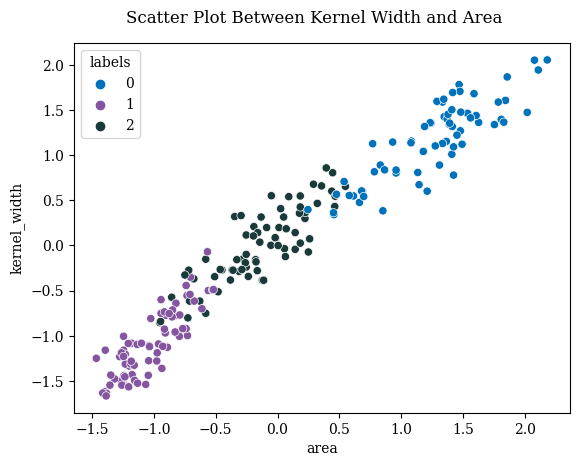

In [13]:
scatterp = sns.scatterplot(df_new, x='area',y='kernel_width', hue='labels', palette=palette)
scatterp.figure.suptitle("Scatter Plot Between Kernel Width and Area", y=0.95, fontsize=12)

plt.savefig('scatterplt.pdf')

### b)

In [33]:
reducer = GaussianRandomProjection(n_components=2)

embedding = reducer.fit_transform(df_new)
embedding = pd.DataFrame(embedding)
embedding['labels'] = df_new['labels']


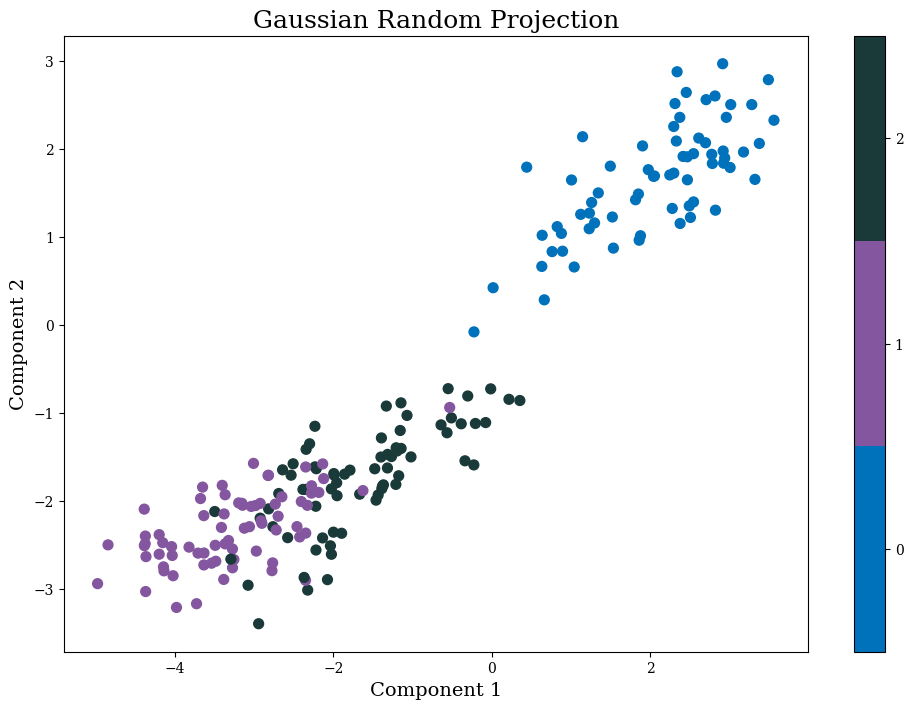

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(embedding[0], embedding[1], c=embedding['labels'], cmap=ListedColormap(palette.values()), s=50)
plt.title('Gaussian Random Projection', fontsize=18)
plt.xlabel('Component 1', fontsize=14)
plt.ylabel('Component 2', fontsize=14)
plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
plt.savefig('gaus_4.pdf')
plt.show()



### c)

In [27]:
embedding2 = umap.UMAP().fit_transform(df_new)
embedding2 = pd.DataFrame(embedding2)
embedding2['labels'] = df_new['labels']

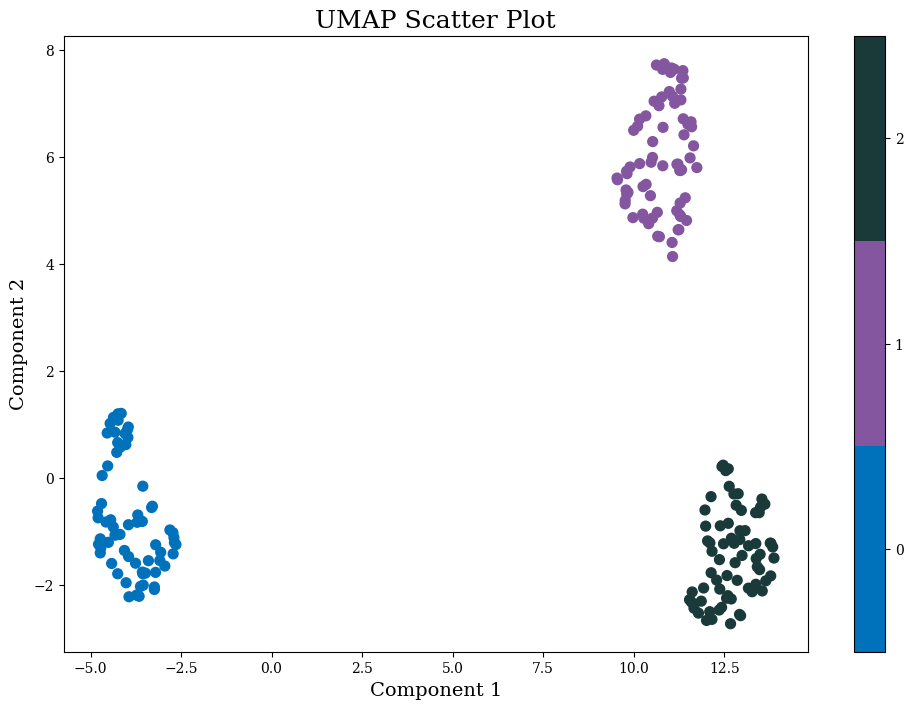

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(embedding2[0], embedding2[1], c=embedding2['labels'], cmap=ListedColormap(palette.values()), s=50)
plt.title('UMAP Scatter Plot', fontsize=18)
plt.xlabel('Component 1', fontsize=14)
plt.ylabel('Component 2', fontsize=14)
plt.colorbar(boundaries=np.arange(4)-0.5).set_ticks(np.arange(3))
plt.savefig('umap_1.pdf')
plt.show()

### d) Discussion in Overleaf (TBD)

## Problem 4: Evaluating Clustering

In [18]:
rand = rand_score(df['numerical_class'],cluster_labels)

print(f"Rand Index: {rand}")

Rand Index: 0.8997038049669629


In [19]:
inertia = kmeans2.inertia_
print("Inertia:", inertia)

Inertia: 430.6589731513006


In [20]:
y_true = df['numerical_class']

#accuracy without permutation
accuracy = accuracy_score(y_true, cluster_labels)
silhouette = silhouette_score(df_new_no_labels, cluster_labels)

print(f"Accuracy: {accuracy}, Silhouette: {silhouette}")


Accuracy: 0.05238095238095238, Silhouette: 0.40072705527512986


In [21]:
best_accuracy = 0
best_permutation = None

# accuracy with permutations
for perm in permutations(set(cluster_labels)):
    # Create a dictionary mapping original cluster labels to permuted cluster labels
    perm_dict = {label: perm[i] for i, label in enumerate(set(cluster_labels))}
    print (perm_dict)
    # Use the mapping to create a list of permuted cluster labels
    permuted_labels = [perm_dict[label] for label in cluster_labels]
    print(permuted_labels)
    # Calculate the accuracy score for the permuted labels
    accuracy = accuracy_score(y_true, permuted_labels)
    
    # Update best accuracy and best permutation if accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_permutation = perm

print("Best Accuracy:", best_accuracy)
print("Best Permutation:", best_permutation)

{0: 0, 1: 1, 2: 2}
[2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
{0: 0, 1: 2, 2: 1}
[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Problem 5

Accuracy with ward linkage: 0.6190476190476191
Accuracy with complete linkage: 0.5428571428571428
Accuracy with average linkage: 0.5857142857142857
Accuracy with single linkage: 0.3380952380952381
Best Accuracy: 0.6190476190476191
Best Permutation: (0, 1, 2)


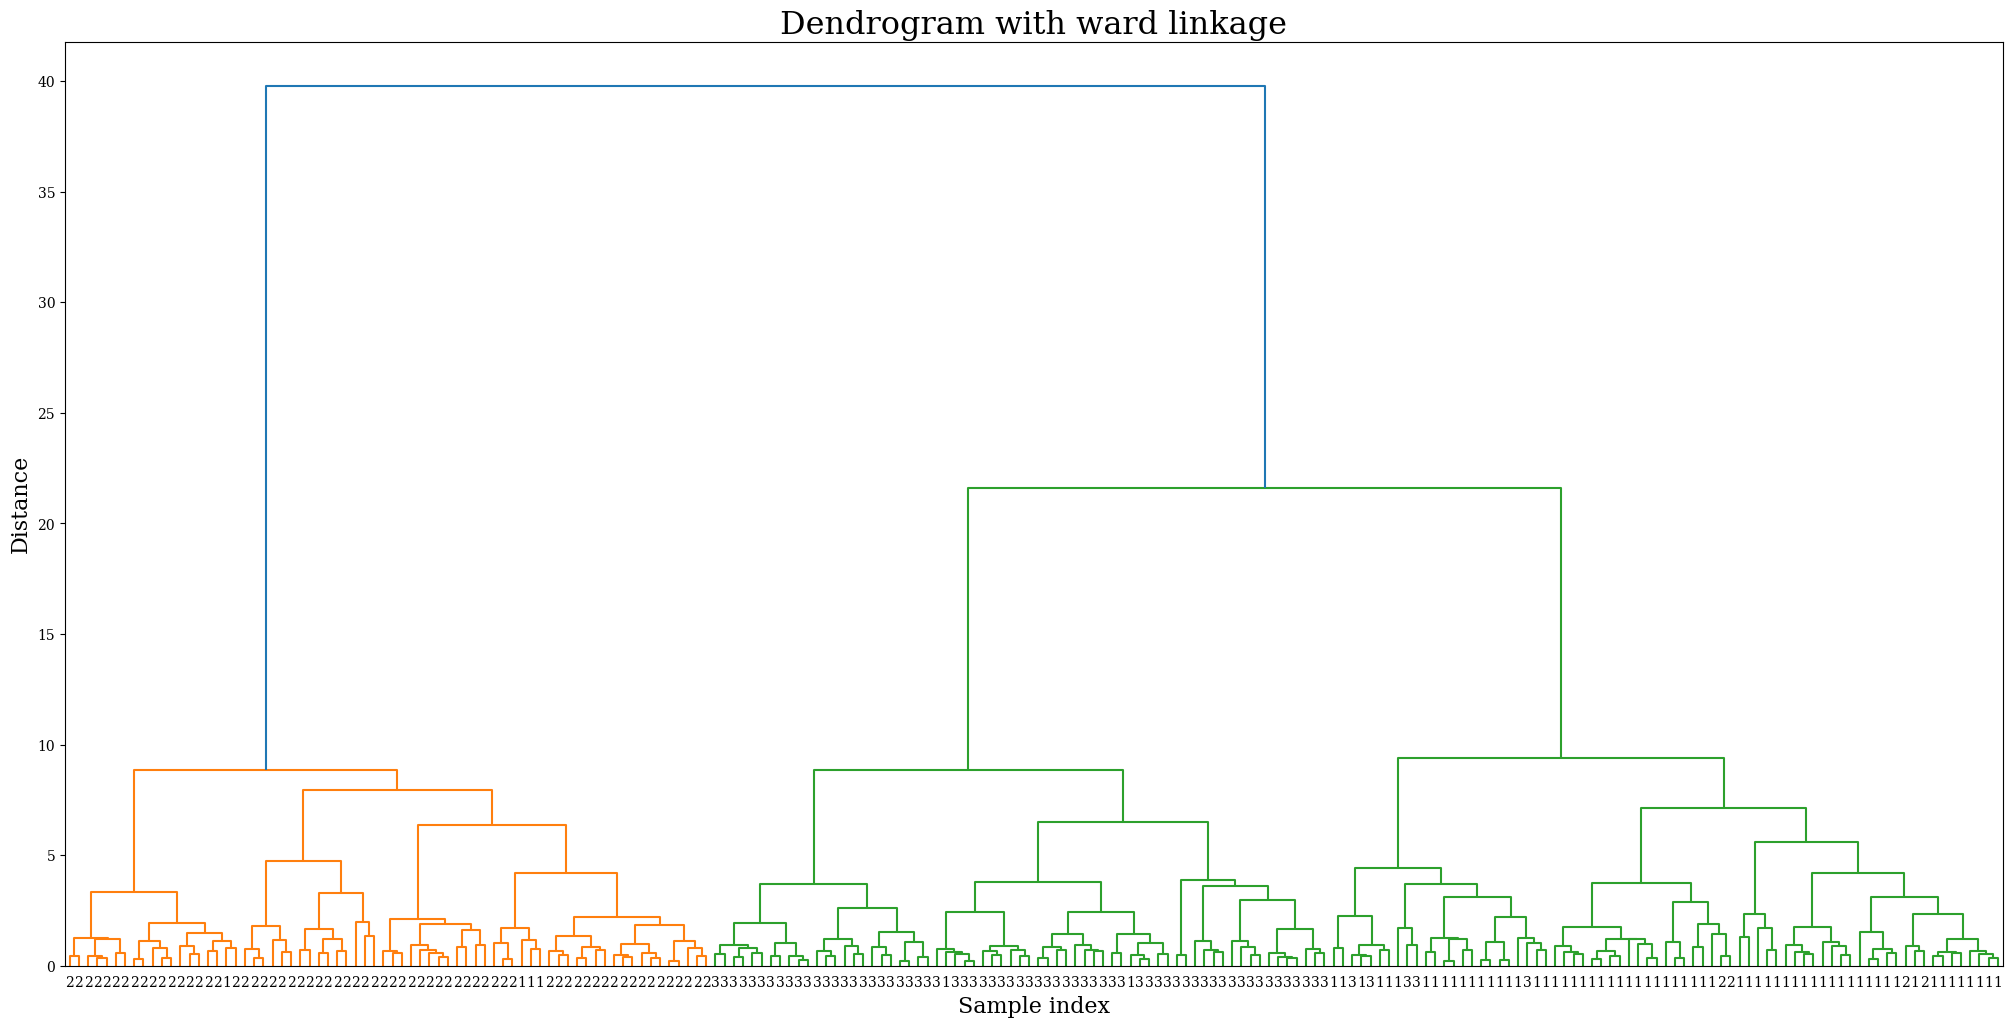

In [22]:

# Perform agglomerative clustering with different linkage options
linkage_options = ['ward', 'complete', 'average', 'single']
best_accuracy_agg = 0
best_linkage = None
best_permutation = None

for linkage_option in linkage_options:
    model = AgglomerativeClustering(n_clusters=len(np.unique(y_true)), linkage=linkage_option)
    labels = model.fit_predict(df_new_no_labels)
    best_accuracy = 0
    # accuracy with permutations
    for perm in permutations(set(labels)):
        # Create a dictionary mapping original cluster labels to permuted cluster labels
        perm_dict_2 = {label: perm[i] for i, label in enumerate(set(labels))}
        # Use the mapping to create a list of permuted cluster labels
        permuted_labels = [perm_dict_2[label] for label in labels]
        accuracy = accuracy_score(y_true, permuted_labels)

        # Update best accuracy and best permutation if accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_permutation = perm

    print(f"Accuracy with {linkage_option} linkage: {best_accuracy}")
    if best_accuracy > best_accuracy_agg:
        best_accuracy_agg = best_accuracy
        best_linkage = linkage_option


print("Best Accuracy:", best_accuracy_agg)
print("Best Permutation:", best_permutation)

# Plot dendrogram with the best linkage option
plt.figure(figsize=(25, 12))
dendrogram(linkage(df_new_no_labels.values, method=best_linkage), labels=y_true.values, leaf_font_size=10)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=0)
plt.title(f'Dendrogram with {best_linkage} linkage', fontsize=23)
plt.xlabel('Sample index', fontsize=16)
plt.ylabel('Distance', fontsize=16)
plt.savefig('dendogram.pdf')
plt.show()